In [1]:
# Load the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [2]:
# function's
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# evaluate a regression model
def evaluate_regression_model(y, yhat):
    '''
    To evaluate regression model by using Mean Squared Error, 
    Root Mean Squared Error, Mean Absolute Error and R^2 Score.
    '''
    try:
        import math
        from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    except Exception as e:
        print(f"Exception [evaluate_regression_model] : {e} ")    
    Mean_Squared_Error = round(mean_squared_error(y, yhat), 2)
    Root_Mean_Squared_Error = round(math.sqrt(mean_squared_error(y, yhat)), 2)
    Mean_Absolute_Error = round(mean_absolute_error(y, yhat), 2)
    R2Score = round(r2_score(y, yhat), 2)
    print(f"Mean Squared Error : {Mean_Squared_Error} ")
    print(f"Root Mean Squared Error : {Root_Mean_Squared_Error} ")
    print(f"Mean Absolute Error : {Mean_Absolute_Error} ")
    print(f"R^2 Score : {R2Score} ")
    return {"Mean_Squared_Error" : Mean_Squared_Error, 
            "Root_Mean_Squared_Error" : Root_Mean_Squared_Error, 
            "Mean_Absolute_Error" : Mean_Absolute_Error, 
            "R2Score" : R2Score}

# evaluate_regression_model(y, yhat)

In [3]:
# Load the dataset
df = pd.read_csv("POMO_dataset/Historical Weather Data 2010-2021_preprocessed_2.csv")
df.head(2)

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,NewLabel
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,6.91,7.18,1709.0,0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,6.77,7.66,1707.0,1,1,1,0,0,0,24


In [4]:
col_list = ['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
            'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']

In [5]:
df1 = df[col_list[0]]
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) # np.array(df1).reshape(-1,1)
df1 = pd.DataFrame(df1, columns=[col_list[0]])
df1.head()

,tempC_avg(0C)
0,0.30
1,0.40
2,0.35
3,0.35
4,0.35


In [6]:
df[col_list[0]].describe()

count    4178.000000
mean       26.508856
std         3.568616
min        17.000000
25%        24.000000
50%        26.000000
75%        29.000000
max        37.000000
Name: tempC_avg(0C), dtype: float64

In [7]:
df1[col_list[0]].describe()

count    4178.000000
mean        0.475443
std         0.178431
min         0.000000
25%         0.350000
50%         0.450000
75%         0.600000
max         1.000000
Name: tempC_avg(0C), dtype: float64

In [8]:
train, test, val = df1.iloc[:3000], df1.iloc[3000:4000], df1.iloc[4000:]
test = test.reset_index(drop=True)
val = val.reset_index(drop=True)

# choose a number of time steps
n_steps = 10 # 30

# split into samples
X_train, y_train = split_sequence(train[col_list[0]], n_steps)
X_test, y_test = split_sequence(test[col_list[0]], n_steps)
X_val, y_val = split_sequence(val[col_list[0]], n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
# X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))


In [10]:
day_col_names = ['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'day8', 'day9', 'day10'] #, 
#                  'day11', 'day12', 'day13', 'day14', 'day15']
#                 , 'day16', 'day17', 'day18', 'day19', 'day20', 
#                  'day21', 'day22', 'day23', 'day24', 'day25', 'day26', 'day27', 'day28', 'day29', 'day30']
X_train_df = pd.DataFrame(X_train, columns=day_col_names)
X_train_df['next_day'] = y_train
X_train_df.head()

,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,next_day
0,0.30,0.40,0.35,0.35,0.35,0.35,0.30,0.30,0.25,0.35,0.40
1,0.40,0.35,0.35,0.35,0.35,0.30,0.30,0.25,0.35,0.40,0.35
2,0.35,0.35,0.35,0.35,0.30,0.30,0.25,0.35,0.40,0.35,0.25
3,0.35,0.35,0.35,0.30,0.30,0.25,0.35,0.40,0.35,0.25,0.25
4,0.35,0.35,0.30,0.30,0.25,0.35,0.40,0.35,0.25,0.25,0.35


In [11]:
X_test_df = pd.DataFrame(X_test, columns=day_col_names)
X_test_df['next_day'] = y_test
X_test_df.head()

,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,next_day
0,0.35,0.30,0.30,0.30,0.35,0.40,0.30,0.30,0.35,0.35,0.30
1,0.30,0.30,0.30,0.35,0.40,0.30,0.30,0.35,0.35,0.30,0.30
2,0.30,0.30,0.35,0.40,0.30,0.30,0.35,0.35,0.30,0.30,0.35
3,0.30,0.35,0.40,0.30,0.30,0.35,0.35,0.30,0.30,0.35,0.40
4,0.35,0.40,0.30,0.30,0.35,0.35,0.30,0.30,0.35,0.40,0.30


In [12]:
X_val_df = pd.DataFrame(X_val, columns=day_col_names)
X_val_df['next_day'] = y_val
X_val_df.head()

,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,next_day
0,0.60,0.65,0.45,0.35,0.50,0.40,0.35,0.45,0.45,0.50,0.45
1,0.65,0.45,0.35,0.50,0.40,0.35,0.45,0.45,0.50,0.45,0.45
2,0.45,0.35,0.50,0.40,0.35,0.45,0.45,0.50,0.45,0.45,0.50
3,0.35,0.50,0.40,0.35,0.45,0.45,0.50,0.45,0.45,0.50,0.45
4,0.50,0.40,0.35,0.45,0.45,0.50,0.45,0.45,0.50,0.45,0.45


In [18]:
X1 = X_train_df.iloc[:,:-1]
y1 = X_train_df.iloc[:,-1]

X2 = X_test_df.iloc[:,:-1]
y2 = X_test_df.iloc[:,-1]

from sklearn.linear_model import LinearRegression 
# Fit regression model
regr = LinearRegression()

# from sklearn.tree import DecisionTreeRegressor
# # Fit regression model
# regr = DecisionTreeRegressor(max_depth=2)

# from sklearn.svm import SVR
# # Fit regression model
# regr = SVR()

# from sklearn import linear_model
# # Fit regression model
# regr = linear_model.Lasso(alpha=0.1)

# from sklearn.ensemble import RandomForestRegressor
# # Fit regression model
# regr = RandomForestRegressor(max_depth=3)



regr.fit(X1, y1)
# Predict

yhat = regr.predict(X2)
print(yhat)

[0.35130482 0.30805919 0.31216131 0.35308629 0.3914995  0.30615999
 0.35395227 0.35130149 0.39436024 0.39280448 0.39417154 0.39489821
 0.39729084 0.4008071  0.3576839  0.36220694 0.36110948 0.36042146
 0.35865817 0.3573766  0.35592241 0.3550923  0.35528204 0.35425694
 0.3119195  0.39926221 0.3506814  0.26877664 0.317205   0.35559105
 0.3074129  0.26763427 0.31304086 0.30565396 0.30640076 0.30670772
 0.3043254  0.30415803 0.34833441 0.34566132 0.34535419 0.30575498
 0.31018609 0.31055995 0.31030102 0.30936784 0.35023397 0.3047996
 0.30754504 0.35087764 0.34723487 0.34766087 0.34954662 0.35068581
 0.35094754 0.39595402 0.35075375 0.35413955 0.35597007 0.39835767
 0.43754557 0.43595808 0.3109425  0.40607745 0.40227834 0.44300249
 0.48309281 0.52399236 0.52298129 0.5288086  0.57813346 0.53417245
 0.54336407 0.58860149 0.58764928 0.58891064 0.5918215  0.55062324
 0.5535528  0.55531412 0.55340599 0.55145297 0.5511965  0.5497423
 0.5489122  0.54910194 0.5057394  0.55074467 0.58950657 0.586033

In [19]:
evaluate_regression_model(y2, yhat)

Mean Squared Error : 0.0 
Root Mean Squared Error : 0.06 
Mean Absolute Error : 0.04 
R^2 Score : 0.9 


{'Mean_Squared_Error': 0.0,
 'Root_Mean_Squared_Error': 0.06,
 'Mean_Absolute_Error': 0.04,
 'R2Score': 0.9}

In [20]:
X3 = X_val_df.iloc[:,:-1]
y3 = X_val_df.iloc[:,-1]

In [21]:
day_input = list(X3.iloc[0].values)

for i in range(100):
    print(f"day_input : {day_input[i:]}")
    day_output = regr.predict([day_input[i:]])[0]
    print(f"day_output : {day_output}")
    day_input.append(day_output)

day_input : [0.6000000000000001, 0.6499999999999999, 0.44999999999999996, 0.3500000000000001, 0.5, 0.3999999999999999, 0.3500000000000001, 0.44999999999999996, 0.44999999999999996, 0.5]
day_output : 0.4890043106606136
day_input : [0.6499999999999999, 0.44999999999999996, 0.3500000000000001, 0.5, 0.3999999999999999, 0.3500000000000001, 0.44999999999999996, 0.44999999999999996, 0.5, 0.4890043106606136]
day_output : 0.4806121709005441
day_input : [0.44999999999999996, 0.3500000000000001, 0.5, 0.3999999999999999, 0.3500000000000001, 0.44999999999999996, 0.44999999999999996, 0.5, 0.4890043106606136, 0.4806121709005441]
day_output : 0.4731065406958298
day_input : [0.3500000000000001, 0.5, 0.3999999999999999, 0.3500000000000001, 0.44999999999999996, 0.44999999999999996, 0.5, 0.4890043106606136, 0.4806121709005441, 0.4731065406958298]
day_output : 0.4655417537962969
day_input : [0.5, 0.3999999999999999, 0.3500000000000001, 0.44999999999999996, 0.44999999999999996, 0.5, 0.4890043106606136, 0.48

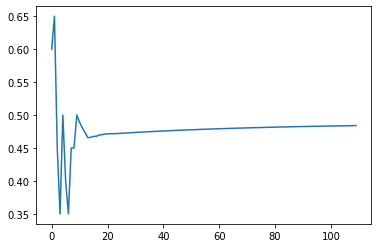

In [22]:
x_axis = range(len(day_input))
y_axis = day_input
plt.plot(x_axis, y_axis)

In [ ]:
# https://towardsdatascience.com/top-machine-learning-algorithms-for-regression-c67258a2c0ac
# https://towardsdatascience.com/a-beginners-guide-to-regression-analysis-in-machine-learning-8a828b491bbf


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("POMO_dataset/Historical Weather Data 2010-2021_preprocessed_2.csv")
df.head(2)

,observation,date,month,year,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,...,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora,NewLabel
0,2010-01-01,1,1,2010,20,30,20,23,42,33,...,6.91,7.18,1709.0,0,0,0,0,0,0,0
1,2010-01-02,2,1,2010,23,29,23,25,49,40,...,6.77,7.66,1707.0,1,1,1,0,0,0,24


In [3]:
df.columns

Index(['observation', 'date', 'month', 'year', 'tempC_7to8', 'tempC_1to2',
       'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8',
       'Relative humidity_1to2', 'Relative humidity_6to7',
       'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2',
       'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8',
       'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8',
       'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)',
       'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7',
       'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 'soil_pH',
       'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)',
       'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose',
       'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora',
       'NewLabel'],
      dtype='object')

In [4]:
df_col_list = ['observation', 'tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
               'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure', 
               'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose','Fruit Spot/ Rot', 'Fusarium Wilt', 
               'Fruit Borer / Blight Blora']

In [5]:
df1 = df[df_col_list]
df1

,observation,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),weatherDesc,Sunshine Hours,%_soil_moisure,Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,23,44,5,1013,0.000000,5,9.8,45,0,0,0,0,0
1,2010-01-02,25,50,5,1014,0.000000,4,9.8,45,1,1,0,0,0
2,2010-01-03,24,63,6,1015,0.000000,4,9.8,41,0,0,0,0,0
3,2010-01-04,24,46,6,1013,0.000000,5,9.8,43,0,0,0,0,0
4,2010-01-05,24,45,4,1011,0.000000,5,9.8,44,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,2021-11-27,26,46,6,1011,0.000000,5,9.7,41,1,0,0,0,0
4174,2021-11-28,26,43,9,1012,0.000000,5,9.7,42,1,0,0,0,0
4175,2021-11-29,22,38,15,1014,0.000000,5,9.7,44,0,0,0,0,0
4176,2021-11-30,22,52,15,1013,0.033333,3,9.6,41,0,0,0,0,0


In [8]:
df2 = df1[df1['Type of Disease (Bacterial Blight/Telya)'] == 1]
df2

,observation,tempC_avg(0C),Relative humidity_avg(%),windspeedKmph_avg(Km/h),pressureMB_avg,precipMM_avg(mm),weatherDesc,Sunshine Hours,%_soil_moisure,Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
1,2010-01-02,25,50,5,1014,0.000000,4,9.8,45,1,1,0,0,0
10,2010-01-11,25,58,5,1013,0.066667,3,9.8,50,1,1,0,0,0
44,2010-02-15,25,23,5,1012,0.000000,4,10.1,43,1,0,0,0,0
50,2010-02-21,29,17,6,1013,0.000000,4,10.1,41,1,0,0,0,0
51,2010-02-22,28,27,7,1012,0.000000,4,10.1,40,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,2021-11-24,27,56,9,1011,0.000000,5,9.7,40,1,1,0,0,0
4171,2021-11-25,27,45,6,1012,0.000000,5,9.7,43,1,0,0,0,0
4172,2021-11-26,26,47,6,1012,0.000000,5,9.7,45,1,0,0,0,0
4173,2021-11-27,26,46,6,1011,0.000000,5,9.7,41,1,0,0,0,0


In [7]:
feature_cols = ['tempC_avg(0C)', 'Relative humidity_avg(%)', 'windspeedKmph_avg(Km/h)', 
                'pressureMB_avg', 'precipMM_avg(mm)', 'weatherDesc', 'Sunshine Hours', '%_soil_moisure']

In [11]:
for fc in feature_cols:
    print(fc, df2[fc].min(), df2[fc].max())

tempC_avg(0C) 25 35
Relative humidity_avg(%) 13 91
windspeedKmph_avg(Km/h) 2 35
pressureMB_avg 997 1016
precipMM_avg(mm) 0.0 2.26666666666666
weatherDesc 1 5
Sunshine Hours 3.8 11.2
%_soil_moisure 30 65
